In [56]:
import os
import pandas as pd
import kagglehub
import numpy as np

# Download latest version
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")

print("Path to dataset files:", path)

# List files inside the dataset directory
files = os.listdir(path)
print("Files in dataset folder:", files)

Path to dataset files: /root/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1
Files in dataset folder: ['Churn_Modelling.csv']


In [ ]:
csv_path = os.path.join(path, files[0])
df = pd.read_csv(csv_path)

In [ ]:
print("Dataset loaded successfully.")
df.head()
# print(df.shape)

Dataset loaded successfully.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns=['RowNumber',"CustomerId","Surname"], inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

KeyError: "None of [Index(['Geography', 'Gender'], dtype='object')] are in the [columns]"

In [ ]:
print(df.columns.tolist())

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
df = df.astype(int)


In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,1
9997,709,36,7,0,1,0,1,42085,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,0,1


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
X_train_scaled

array([[-1.11833347, -0.84839766, -0.34588261, ..., -0.5821616 ,
        -0.57600312,  0.9104886 ],
       [ 0.17644758,  0.67279499, -1.72803092, ..., -0.5821616 ,
        -0.57600312,  0.9104886 ],
       [ 1.20191418, -0.37302496,  0.34519154, ...,  1.71773609,
        -0.57600312, -1.0983114 ],
       ...,
       [ 0.36289605, -0.4680995 , -0.69141969, ..., -0.5821616 ,
        -0.57600312, -1.0983114 ],
       [-0.14465812,  0.19742228, -1.03695677, ..., -0.5821616 ,
        -0.57600312,  0.9104886 ],
       [-0.38289783, -0.84839766, -0.69141969, ...,  1.71773609,
        -0.57600312, -1.0983114 ]])

In [98]:
X_test_scaled

array([[-0.77651127, -0.27795042,  1.03626569, ...,  1.71773609,
        -0.57600312, -1.0983114 ],
       [ 1.3987209 ,  0.10234774,  0.34519154, ..., -0.5821616 ,
         1.73610172,  0.9104886 ],
       [-0.92152675, -0.75332312, -0.34588261, ...,  1.71773609,
        -0.57600312,  0.9104886 ],
       ...,
       [ 1.75090134,  0.0072732 , -1.38249384, ..., -0.5821616 ,
        -0.57600312, -1.0983114 ],
       [-0.10322512,  1.14816769, -1.03695677, ...,  1.71773609,
        -0.57600312, -1.0983114 ],
       [ 0.4146873 , -0.9434722 ,  1.38180277, ..., -0.5821616 ,
        -0.57600312, -1.0983114 ]])

In [100]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [101]:
model = Sequential()

# design the architecture of our Neural Network
model.add(Dense(10,activation='relu', input_dim=11))
model.add(Dense(6,activation='relu', input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [104]:
history = model.fit(X_train_scaled, y_train, epochs=60, validation_split=0.2)

Epoch 1/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5517 - loss: 0.6849 - val_accuracy: 0.7994 - val_loss: 0.4843
Epoch 2/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8001 - loss: 0.4598 - val_accuracy: 0.7931 - val_loss: 0.4478
Epoch 3/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8089 - loss: 0.4271 - val_accuracy: 0.8037 - val_loss: 0.4379
Epoch 4/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8204 - loss: 0.4127 - val_accuracy: 0.8225 - val_loss: 0.4277
Epoch 5/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8337 - loss: 0.4041 - val_accuracy: 0.8269 - val_loss: 0.4163
Epoch 6/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8418 - loss: 0.3751 - val_accuracy: 0.8319 - val_loss: 0.4062
Epoch 7/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8481 - loss: 0.3724 - val_accuracy: 0.8350 - val_loss: 0.4000
Epoch 8/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8533 - loss: 0.3553 - val_accuracy:

In [105]:
# where our params stored

model.layers[0].get_weights()

[array([[-0.04512891,  0.09560798, -0.08889493,  0.06412759, -0.01052622,
         -0.40767917,  0.17165181,  0.17898865,  0.24815437,  0.49389097],
        [-0.6329565 , -0.14851029,  0.07947953, -0.69807065, -0.20091768,
         -0.1333591 , -0.16292912, -0.8296576 ,  0.392863  , -0.06795477],
        [ 0.13617599, -0.13597491,  0.145992  , -0.0218913 ,  0.11519022,
          0.00535622, -0.1267583 , -0.18582211,  0.05418446, -0.008339  ],
        [-0.34953642,  0.2687144 , -0.65137446, -0.06562326, -0.1743536 ,
         -0.6605266 , -0.18617156,  0.01752068, -0.02592469,  0.63396955],
        [ 0.05516015,  1.3010113 , -0.25502202,  0.03383141,  0.19099224,
          0.80925626, -1.0342461 ,  0.00431974,  0.07164586,  0.4814563 ],
        [-0.09888061, -0.02907016, -0.30091935,  0.01124629,  0.41356796,
          0.21695068,  0.00707335, -0.20601146,  0.07919772, -0.43679687],
        [-0.4866991 , -0.23896776, -0.5858956 , -0.31347066,  0.5122507 ,
         -0.68254226, -0.4346934

In [106]:
model.layers[1].get_weights()

[array([[ 0.18346542,  0.9071276 , -0.21158521,  0.7715456 ,  0.19526507,
          0.38086984],
        [-0.9421626 ,  0.35474923,  0.82584757, -0.3464267 , -0.738499  ,
         -0.701337  ],
        [-0.08051396, -0.28328502,  0.08470567, -0.17745364, -0.03678387,
          0.67490155],
        [-0.09279791, -0.9639586 , -0.59112144,  0.78717375,  0.48471087,
         -0.52378   ],
        [ 0.38781488, -0.60889035, -0.24704853, -0.0771057 ,  0.6840551 ,
          0.08658221],
        [-0.5886136 , -0.01067244,  0.4182066 , -0.16184257,  0.31956124,
         -0.5323582 ],
        [ 0.5317655 , -0.15405835,  0.7348228 , -0.5892441 , -0.44425762,
         -0.02518257],
        [ 0.49866536,  0.57771677, -0.97630864,  0.43042356,  0.16087732,
          0.18716528],
        [ 0.03890502, -0.03246899, -0.15095049,  0.32229945,  0.7016941 ,
          0.4057377 ],
        [-0.17824124, -0.1996692 ,  0.47293168,  0.10607577,  0.10835659,
         -0.6572012 ]], dtype=float32),
 array([0.058

In [107]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.25064465],
       [0.02432251],
       [0.04745539],
       ...,
       [0.28129974],
       [0.9998836 ],
       [0.01502077]], dtype=float32)

In [108]:
# this is not in the form of 0 or 1
# we need to set a threshold

y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [109]:
y_pred = np.where(y_log > 0.5,1,0)

In [110]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [111]:
# for getting the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.866

In [112]:
history

In [113]:
history.history

{'accuracy': [0.6873437762260437,
  0.800000011920929,
  0.8076562285423279,
  0.824999988079071,
  0.8354687690734863,
  0.8409374952316284,
  0.8467187285423279,
  0.8478124737739563,
  0.8500000238418579,
  0.8520312309265137,
  0.8531249761581421,
  0.8534374833106995,
  0.8564062714576721,
  0.8560937643051147,
  0.8579687476158142,
  0.8573437333106995,
  0.8576562404632568,
  0.8615624904632568,
  0.8609374761581421,
  0.8621875047683716,
  0.8607812523841858,
  0.8612499833106995,
  0.864062488079071,
  0.86328125,
  0.8628125190734863,
  0.8628125190734863,
  0.86328125,
  0.86328125,
  0.8653125166893005,
  0.8642187714576721,
  0.8629687428474426,
  0.8662499785423279,
  0.8645312786102295,
  0.8646875023841858,
  0.8645312786102295,
  0.8645312786102295,
  0.8643749952316284,
  0.8637499809265137,
  0.8635937571525574,
  0.8635937571525574,
  0.8650000095367432,
  0.8651562333106995,
  0.8660937547683716,
  0.8657812476158142,
  0.8657812476158142,
  0.8645312786102295,
  0

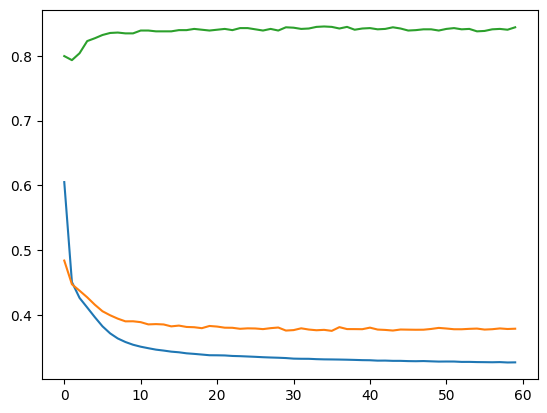

In [116]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])